### Task : Classification ( Logistic Regression -> Multiclass (OneVsAll) )
#### Input Features (Predictor Variables) : sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)
#### Output (Response Variable(s)) : Class (0 or 1 or 2)

### Importing the necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, datasets, metrics, preprocessing, model_selection, pipeline, base

### Collecting, Analyzing and Visualizing the data

In [2]:
data = datasets.load_iris()
print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [3]:
# Converting data into a data frame (for analysis)

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [5]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
corr_matrix = df.iloc[:, :-1].corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


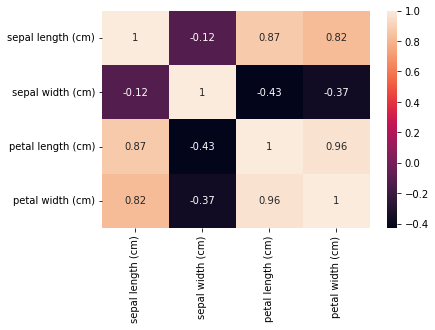

In [8]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [9]:
corr_matrix_ = corr_matrix['petal length (cm)'].sort_values(ascending = False)
corr_matrix_

petal length (cm)    1.000000
petal width (cm)     0.962865
sepal length (cm)    0.871754
sepal width (cm)    -0.428440
Name: petal length (cm), dtype: float64

In [10]:
num_attr = np.array(corr_matrix_.keys())
target = df.columns[-1]

In [11]:
df0 = df[df[target] == 0]
df1 = df[df[target] == 1]
df2 = df[df[target] == 2]

In [12]:
corr_matrix.iloc[0, 1]

-0.11756978413300088

Correlation Co-efficient : -0.11756978413300088


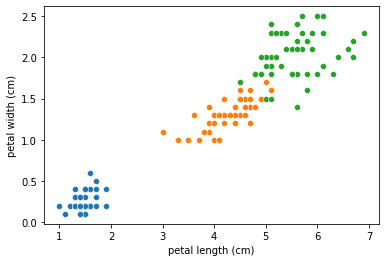

Correlation Co-efficient : 0.8717537758865838


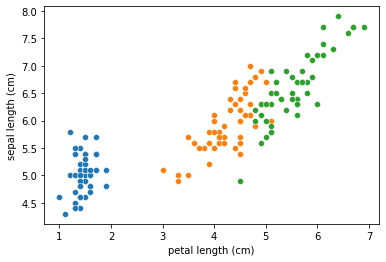

Correlation Co-efficient : 0.8179411262715758


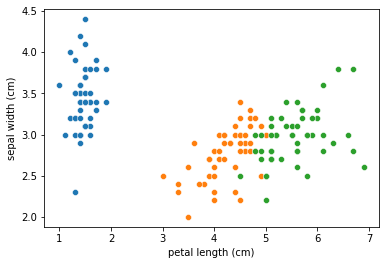

Correlation Co-efficient : -0.42844010433053864


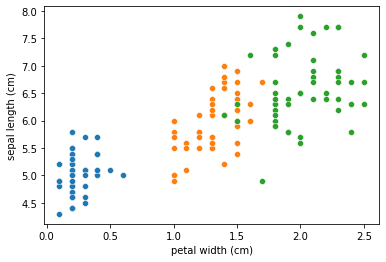

Correlation Co-efficient : -0.3661259325364377


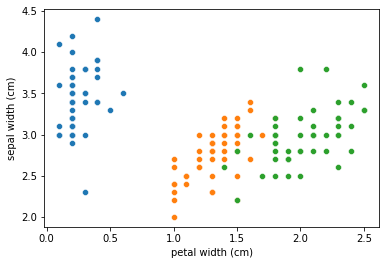

Correlation Co-efficient : 0.962865431402796


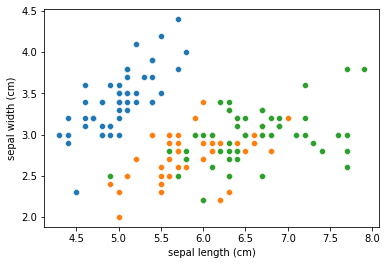

In [13]:
# Scatter Plot

for i in range(len(num_attr)):
    for j in range(i + 1, len(num_attr)):
        attr1, attr2 = num_attr[i], num_attr[j]
        print("Correlation Co-efficient :", corr_matrix.iloc[i, j])
        sns.scatterplot(x = attr1, y = attr2, data = df0)
        sns.scatterplot(x = attr1, y = attr2, data = df1)
        sns.scatterplot(x = attr1, y = attr2, data = df2)
        plt.show()

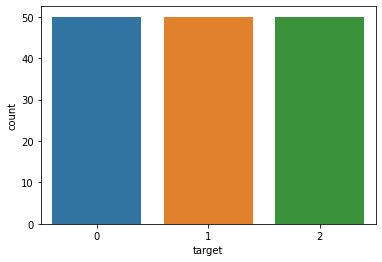

In [14]:
# Count Plot

sns.countplot(x = target, data = df)
plt.show()

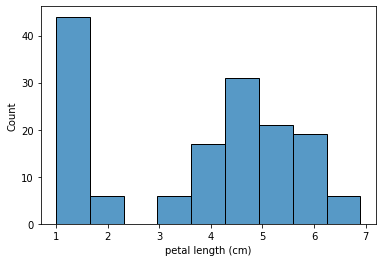

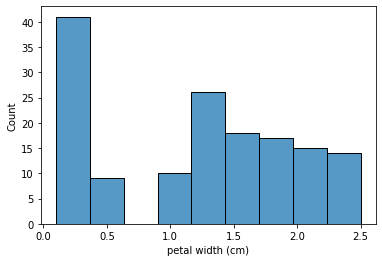

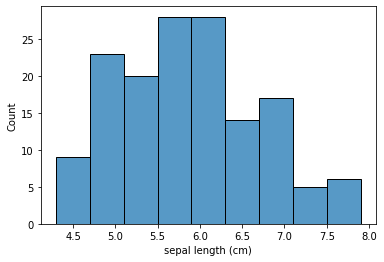

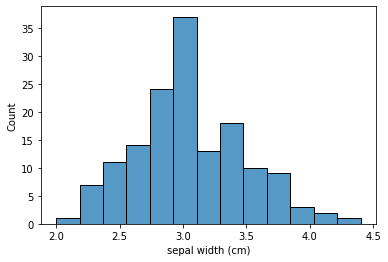

In [15]:
# Histogram

for attr in num_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

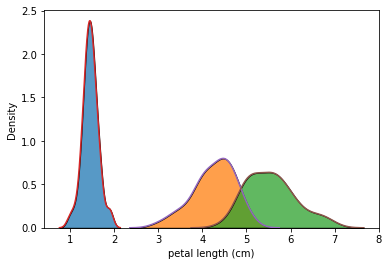

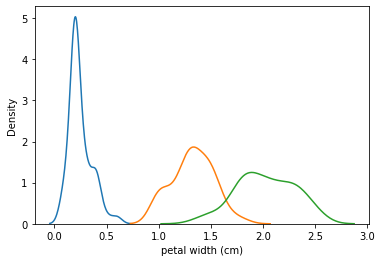

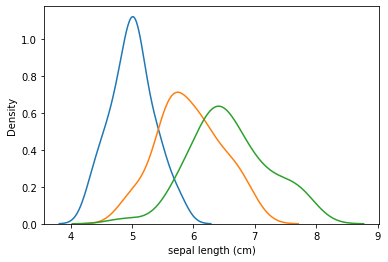

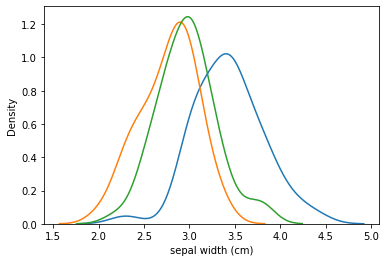

In [16]:
# Kernel Density Plot

sns.kdeplot(x = num_attr[0], data = df0, multiple = 'stack')
sns.kdeplot(x = num_attr[0], data = df1, multiple = 'stack')
sns.kdeplot(x = num_attr[0], data = df2, multiple = 'stack')

for attr in num_attr:
    sns.kdeplot(x = attr, data = df0)
    sns.kdeplot(x = attr, data = df1)
    sns.kdeplot(x = attr, data = df2)
    plt.show()

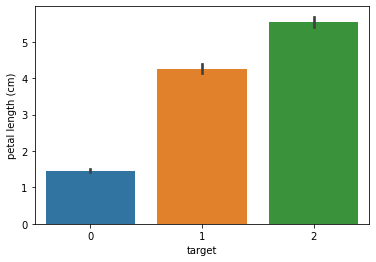

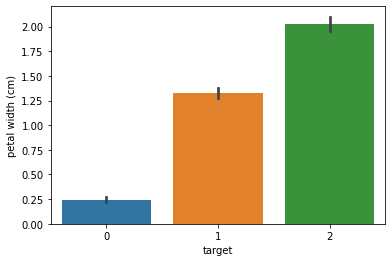

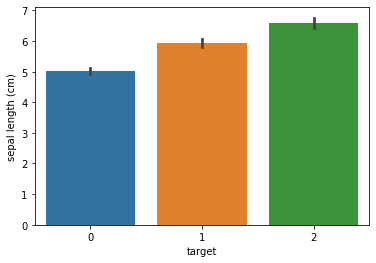

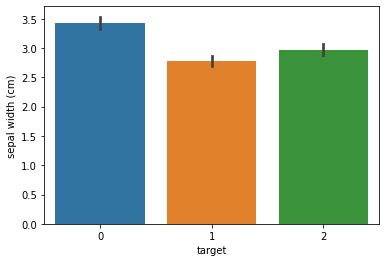

In [17]:
# Bar Chart

for attr in num_attr:
    sns.barplot(x = target, y = attr, data = df)
    plt.show()

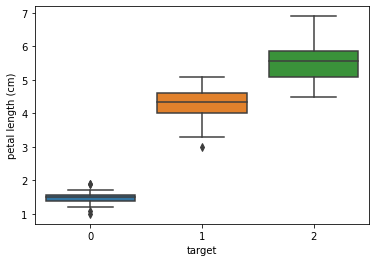

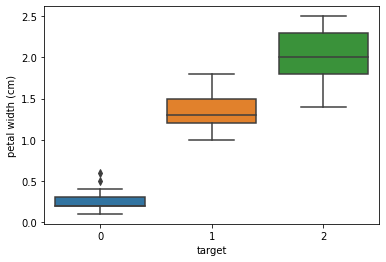

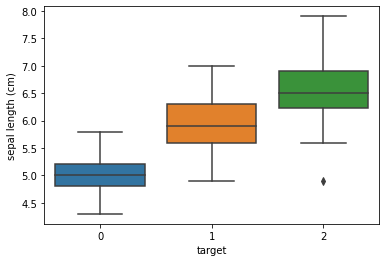

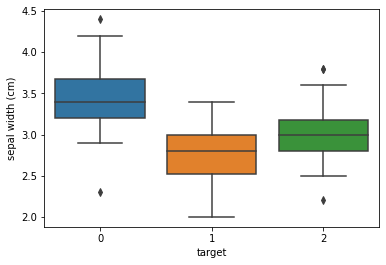

In [18]:
# Box Plot (Identifies Skewness)

for attr in num_attr:
    sns.boxplot(x = target, y = attr, data = df)
    plt.show()

In [19]:
print(df.groupby(target)[num_attr[0]].mean(), '\n\n')
print(df.groupby(target)[num_attr[1]].mean())

target
0    1.462
1    4.260
2    5.552
Name: petal length (cm), dtype: float64 


target
0    0.246
1    1.326
2    2.026
Name: petal width (cm), dtype: float64


Mean petal length (cm)


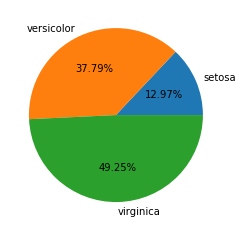

Mean petal width (cm)


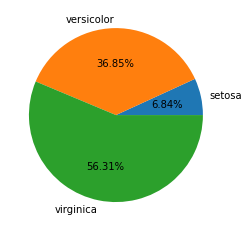

In [20]:
# Pie Chart

print(f"Mean {num_attr[0]}")
plt.pie(x = df.groupby(target)[num_attr[0]].mean(), labels = data.target_names, autopct = "%.2f%%")
plt.show()

print(f"Mean {num_attr[1]}")
plt.pie(x = df.groupby(target)[num_attr[1]].mean(), labels = data.target_names, autopct = "%.2f%%")
plt.show()

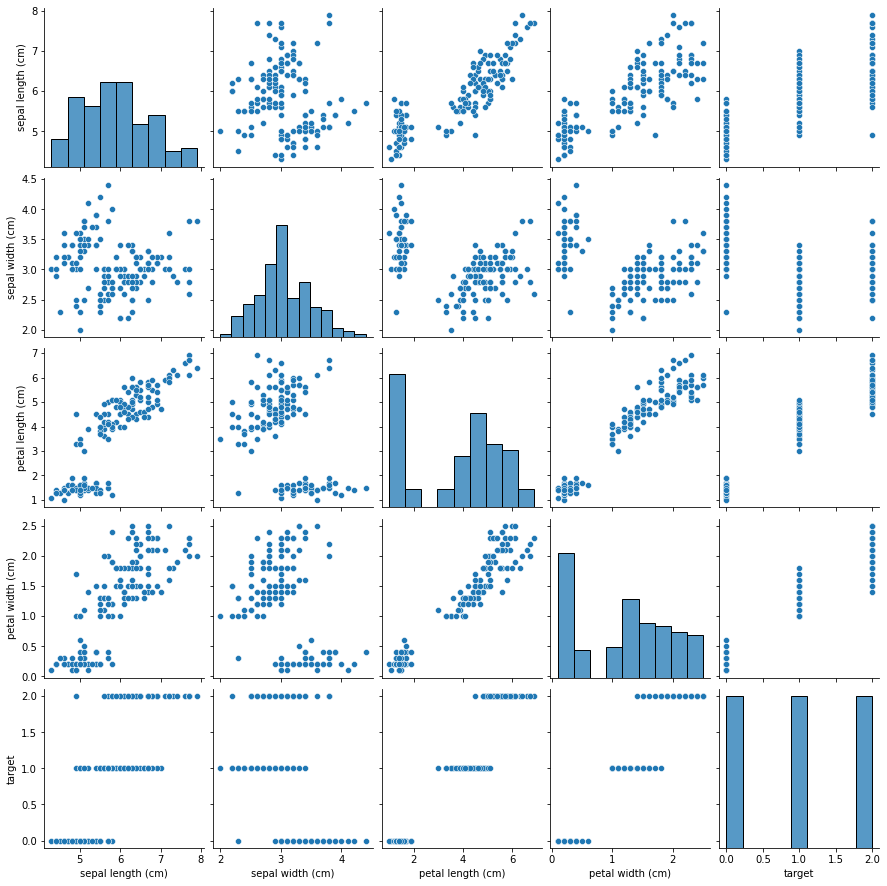

In [21]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preperation

In [22]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [23]:
# Stratified Shuffle Split

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_index, test_index in strat_split.split(df, df[target]):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]

In [24]:
print("Size of train set :", y_train.shape[0])
print("Size of test set :", y_test.shape[0])

Size of train set : 120
Size of test set : 30


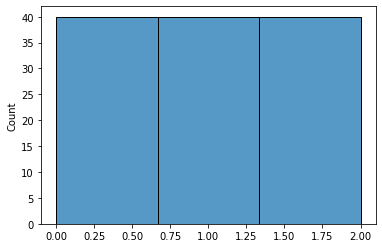

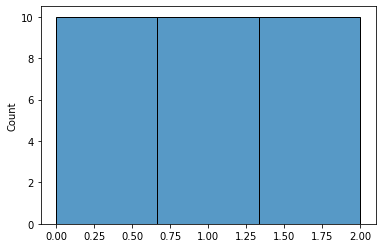

In [25]:
# Checking whether the samples are distributed uniformely

sns.histplot(y_train, bins = len(np.unique(y_train)))
plt.show()

sns.histplot(y_test, bins = len(np.unique(y_train)))
plt.show()

In [26]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()),
])

In [27]:
# Scaling the features (Standardization)

X_train_scaled = p.fit_transform(X_train)
X_test_scaled = p.fit_transform(X_test)

### Training the model and Evaluating it's performance

In [28]:
# Implementing Logistic Regression through Batch Gradient Descent from scratch

class LogisticRegression:
    
    def __init__(self, n_iter = 10000, lr = 0.0001, tol = 0.001):
        self.n_iter = n_iter
        self.lr = lr
        self.w = self.b = None
        self.tol = tol
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        cost_ = 0
        for i in range(self.n_iter):
            z = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(z)
            cost = (-1 / n) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            dw = (1 / n) * np.dot(X.T, y_pred - y)
            db = (1 / n) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db
            if (abs(cost - cost_) <= self.tol):
                break
            cost_ = cost
    
    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        temp = self.sigmoid(z)
        y_pred = (temp > 0.5).astype(int)
        return y_pred
    
    def score(self, X, y):
        y_pred = self.predict(X)
        acc = np.sum(y == y_pred) / len(y)
        return acc
        
    @staticmethod 
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [29]:
# Number of classifiers need to be trained

n_clf = len(np.unique(y))

In [30]:
# Preparing training sets for each of the unique label

y_train_sets = []

for i in range(n_clf):
    y_train_i = (y_train == i).astype(int)
    y_train_sets.append(y_train_i)

In [31]:
# Training 'n_clf' binary classifiers

clfs = []

for i in range(n_clf):
    clf = LogisticRegression(n_iter = 100000, lr = 0.02, tol = 0.00000001)
    clfs.append(clf)
    clfs[i].fit(X_train, y_train_sets[i])

In [32]:
y_train_pred_all = []
y_train_scores = []

for i in range(n_clf):
    y_train_pred = clfs[i].predict(X_train)
    y_train_pred_all.append(y_train_pred)
    y_train_scores.append(clfs[i].score(X_train, y_train_sets[i]))

In [33]:
y_train_scores

[1.0, 0.7583333333333333, 0.9833333333333333]

In [34]:
# Stacking individual classifier predictions

y_train_pred_stacked = np.stack(y_train_pred_all, axis = 1)

In [35]:
y_train_pred_final = []

for pred in y_train_pred_stacked:
    if not any(pred):
        y_train_pred_final.append(np.argmin(y_train_scores))
    else:
        y_train_pred = np.argmax(pred + y_train_scores)
        y_train_pred_final.append(y_train_pred)

In [36]:
train_acc = np.sum(y_train == y_train_pred_final) / len(y_train)

print("Train Accuracy :", train_acc)

Train Accuracy : 0.9833333333333333


#### Sklearn Implementation

In [37]:
# Implementing Logistic Regression through Sklearn

model = linear_model.LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_train_pred = model.predict(X_train)

print("Train Accuracy :", model.score(X_train, y_train))

Train Accuracy : 0.9833333333333333


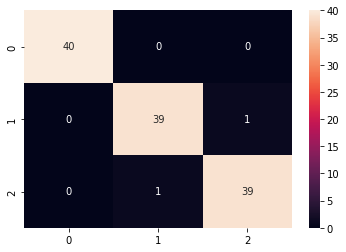

In [39]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_train, y_train_pred)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [40]:
# Classification Metrics

precision = metrics.precision_score(y_train, y_train_pred, average = 'weighted')
recall = metrics.recall_score(y_train, y_train_pred, average = 'weighted')
f1 = metrics.f1_score(y_train, y_train_pred, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9833333333333333
Recall or Sensitivity : 0.9833333333333333
F1 Score : 0.9833333333333333


In [41]:
# Classification Report

clf_report = metrics.classification_report(y_train, y_train_pred)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.97      0.97        40
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



### Validating the model

In [42]:
y_test_sets = []

for i in range(n_clf):
    y_test_sets.append((y_test == i).astype(int))
    
y_test0, y_test1, y_test2 = y_test_sets

In [43]:
y_test_pred_all = []
y_test_scores = []

for i in range(n_clf):
    y_test_pred = clfs[i].predict(X_test)
    y_test_pred_all.append(y_test_pred)
    y_test_scores.append(clfs[i].score(X_test, y_test_sets[i]))

In [44]:
y_test_scores

[1.0, 0.7, 0.9666666666666667]

In [45]:
# Stacking individual classifier predictions

y_test_pred_stacked = np.stack(y_test_pred_all, axis = 1)

In [46]:
y_test_pred_final = []

for pred in y_test_pred_stacked:
    if not any(pred):
        y_test_pred_final.append(np.argmin(y_test_scores))
    else:
        y_test_pred = np.argmax(pred + y_test_scores)
        y_test_pred_final.append(y_test_pred)

In [70]:
test_acc = np.sum(y_test == y_test_pred_final) / len(y_test)

print("Test Accuracy :", test_acc)

Test Accuracy : 0.9666666666666667


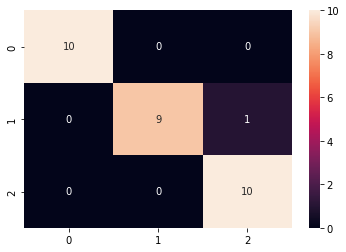

In [52]:
# Confusion Matrix

conf_matrix = metrics.confusion_matrix(y_test, y_test_pred_final)

sns.heatmap(conf_matrix, annot = True)
plt.show()

In [58]:
# Classification Metrics

precision = metrics.precision_score(y_test, y_test_pred_final, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_final, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_final, average = 'weighted')

print("Precision :", precision)
print("Recall or Sensitivity :", recall)
print("F1 Score :", f1)

Precision : 0.9696969696969696
Recall or Sensitivity : 0.9666666666666667
F1 Score : 0.9665831244778613


In [59]:
# Classification Report

clf_report = metrics.classification_report(y_test, y_test_pred_final)

print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Cross Validation 

In [55]:
scores = model_selection.cross_val_score(linear_model.LogisticRegression(max_iter = 1000), X, y, cv = 10)

print(scores)
print("Cross Validation Score (Average) :", np.sum(scores) / len(scores))

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
Cross Validation Score (Average) : 0.9733333333333334
